# 파이토치 기본

In [1]:
import torch
import numpy as np

print(torch.__version__)
print(torch.cuda.is_available())

1.11.0
True


##  1.텐서


### 1-1. 여러가지 텐서

In [4]:
# 빈 텐서 생성 - 초기화되지 않으면 해당 시점에 할당된 메모리에 존재하던 값이 들어감 
x1 = torch.empty(5,4)
print('x1 : ',x1,'\n')

# 1로 채워진 텐서 생성 
x2 = torch.ones(3,3)
print('x2 : ',x2,'\n')

# 0으로 채워진 텐서 생성 
x3 = torch.zeros(2,2)
print('x3 : ',x3,'\n')

# 무작위값 텐서 생성 ( 0 ~ 1 사잇값 )
x4 = torch.rand(2,3)
print('x4 : ',x4,'\n')



x1 :  tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.4013e-45, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]]) 

x2 :  tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]) 

x3 :  tensor([[0., 0.],
        [0., 0.]]) 

x4 :  tensor([[0.7786, 0.8177, 0.1133],
        [0.2672, 0.8514, 0.0934]]) 



### 1-2. 리스트, 넘파이 배열 to Tensor

`torch.tensor()`를 통해 tensor로 변환이 가능하며   
`torch.FloatTensor()`나 `torch.LongTensor()`를 통해서도 가능하다. 

In [3]:
l = [13,4]
r = np.array([4,56,7])
print(type(l))
print(type(r))

print('---to tensor---')

l = torch.tensor(l)
r = torch.tensor(r)
print(type(l))
print(type(r))


<class 'list'>
<class 'numpy.ndarray'>
---to tensor---
<class 'torch.Tensor'>
<class 'torch.Tensor'>


### 1-3. 텐서의 크기,타입, 연산

`.size()`는 텐서의 크기를 확인할 때 자주 사용한다.  

텐서의 연산은 넘파이에서의 연산과 매우 비슷하다. 추가적으로 편리한 기능들이 있다. 

In [10]:
print('x1 :',x1,'\n')
print('x1 size :',x1.size(),'\n')
print('x1 type :',type(x1))

x1 : tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.4013e-45, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]]) 

x1 size : torch.Size([5, 4]) 

x1 type : <class 'torch.Tensor'>


In [11]:
x = torch.rand(2,2)
y = torch.rand(2,2)

In [12]:
# 아래 방법 모두 같은 결과를 return 함 
print(x + y)
print(torch.add(x,y))
print(y.add(x)) 

tensor([[0.7310, 1.0919],
        [1.1280, 0.6940]])
tensor([[0.7310, 1.0919],
        [1.1280, 0.6940]])
tensor([[0.7310, 1.0919],
        [1.1280, 0.6940]])


In [13]:
# .함수_()의 형태로 사용하면 함수를 수행하고 .앞의(왼쪽의) 객체에 결과값을 저장하여 반환한다. 
y.add_(x)
print(y)

tensor([[0.7310, 1.0919],
        [1.1280, 0.6940]])


### 1-4. 텐서의 크기 변환

In [14]:
x = torch.rand(8,8)
print(x.shape)
print(x.size())
print(x)

torch.Size([8, 8])
torch.Size([8, 8])
tensor([[0.7383, 0.9801, 0.6512, 0.0753, 0.2815, 0.3412, 0.0359, 0.2854],
        [0.0586, 0.8836, 0.1280, 0.9286, 0.9822, 0.9460, 0.2073, 0.3830],
        [0.7138, 0.8420, 0.4683, 0.9938, 0.5137, 0.2542, 0.6821, 0.4033],
        [0.6936, 0.0728, 0.3691, 0.6922, 0.6833, 0.6820, 0.3953, 0.6213],
        [0.4747, 0.6235, 0.0868, 0.3041, 0.5113, 0.3240, 0.4327, 0.3000],
        [0.6861, 0.2921, 0.4406, 0.7030, 0.8910, 0.2494, 0.0833, 0.8865],
        [0.2678, 0.5873, 0.0479, 0.8481, 0.6336, 0.7286, 0.3934, 0.1495],
        [0.0945, 0.8481, 0.8700, 0.4341, 0.5402, 0.2315, 0.1194, 0.0295]])


In [15]:
a = x.view(64) # 8 x 8 -> 64
print(a.size())

b = x.view(-1,4,4) # -1은 알맞는 값으로 알아서 채워줌 
print(b.size())

torch.Size([64])
torch.Size([4, 4, 4])


### 1-5. 텐서에서 넘파이 배열로 변환 

`.numpy()`를 이용하여 텐서를 넘파이 배열로 변환 가능하다. 

In [36]:
x = torch.rand(8,8)
print(type(x))
y = x.numpy()
print(type(y))

<class 'torch.Tensor'>
<class 'numpy.ndarray'>


### 1-6. 단일 텐서(1,)에서 값으로 반환하기

`.item()`을 사용하여 size가 (1,)인 텐서에서 스칼라값을 추출해 준다. 

In [40]:
x = torch.ones(1)
print(x)
print(x.item())

tensor([1.])
1.0


## 2.역전파 

### 2-1. Gradient Tensor 



`requires_grad = True`는 해당 텐서를 기준으로 모든 연산들을 추적하여 `그래디언트`라고 하는 미분값의 모임을 계산할 수 있게 한다. 

In [20]:
import torch

# equires_grad = True를 설정하여 x를 기준으로 미분값을 기억하게 한다. 
x = torch.ones(2,2,requires_grad = True)
y = x+1
z = 2*y**2
r = z.mean()
print("Result: ",r)
print("Result: ",z)

Result:  tensor(8., grad_fn=<MeanBackward0>)
Result:  tensor([[8., 8.],
        [8., 8.]], grad_fn=<MulBackward0>)


In [21]:
r.backward()
print(x.grad)

tensor([[2., 2.],
        [2., 2.]])


### 2-2. 자동 미분 - 선형회귀식 



In [59]:
# torch와 그래프를 그리기위한 pyplot
import torch


# Float형태의 Tensor를 만들어준다. 이때 range(5)라는 list를 Tensor로 바꿔주고 unsqueeze()를 통해 차원을 늘려준다. 
x = torch.FloatTensor(range(5)).unsqueeze(1)

# y 는 결과값으로 임의로 5개의 값을 만들어준다. 
y = 2*x+torch.rand(5,1)

# 변수의 갯수(Feature의 갯수)를 저장하는 변수 
num_features = x.shape[1]

In [60]:

# x와 곱해져야 하므로 (1,1)크기의 w(가중치)를 만든다. 
w = torch.randn(num_features,1,requires_grad = True)
# w에 더해지는 편향으로 (1,1)에 더해지며 모든 인스턴스에 동일한 값이 더해지므로 1의 크기로 설정해 준다. 
b = torch.randn(1,requires_grad=True)

# 학습되는 것은 input데이터나 output데이터가 아니라 가중치와 편향이기 때문에 requires_grad 값을 넣어준다. 

In [61]:
# 학습을 위해 필요한 하이퍼파라미터를 설정해 준다. 
# learning rate와 optimizer를 설정해 준다. 
learning_rate = 1e-3
optimizer = torch.optim.SGD([w,b], lr = learning_rate)

# https://pytorch.org/docs/stable/optim.html

In [62]:
loss_stack = []

# for문을 이용해 epoch 설정
for epoch in range(1001):
    
    # optim에 설정된 grad를 모두 초기화 - grad값은 누적되기 때문
    optimizer.zero_grad()

    # 순전파 시행 
    y_hat = torch.matmul(x,w)+b

    # loss 값 계산 - MSE(평균 제곱 오차)
    loss = torch.mean((y_hat-y)**2)

    # 계산된 loss로부터 backwad(역전파)하여 grad값을 계산
    loss.backward()

    # 계산된 grad를 w와 b에 대해 최적화 시행 
    optimizer.step()

    # loss값을 모니터링하기 위해 list에 저장 
    loss_stack.append(loss.item())

    if epoch % 100 ==0:
        print(f'Epoch {epoch}:{loss.item()}')

        

Epoch 0:73.69173431396484
Epoch 100:4.999112129211426
Epoch 200:0.37550145387649536
Epoch 300:0.06321201473474503
Epoch 400:0.041159022599458694
Epoch 500:0.038753002882003784
Epoch 600:0.03777275234460831
Epoch 700:0.03698057681322098
Epoch 800:0.03628288209438324
Epoch 900:0.035663947463035583
Epoch 1000:0.03511476889252663


In [63]:
with torch.no_grad():
    y_hat = torch.matmul(x,w)+b

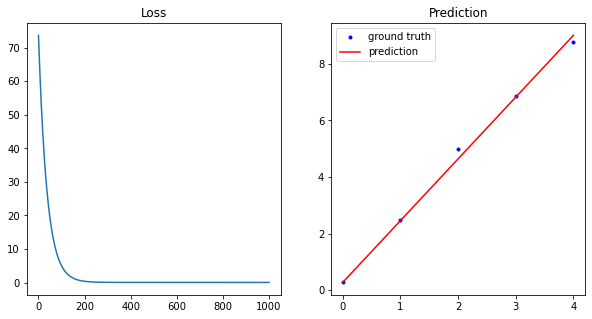

In [64]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(loss_stack)
plt.title("Loss")
plt.subplot(122)
plt.plot(x,y,'.b')
plt.plot(x,y_hat,'r-')
plt.legend(['ground truth','prediction'])
plt.title('Prediction')
plt.show()

## 3.데이터 불러오기

데이터를 배치 형태로 만드는 법과 데이터를 전처리하는 방법에 대해서 알아본다. 

### 3-1.파이토치 제공 데이터 사용 

In [3]:
import torch # torch 기본 라이브러리
import torchvision # 이미지 관련 torch 라이브러리
import torchvision.transforms as tr # 이미지 전처리 기능 라이브러리
from torch.utils.data import DataLoader, Dataset # 데이터를 모델에 사용할 수 있도록 정리해 주는 라이브러리
import numpy as np
import matplotlib.pyplot as plt


In [91]:
# transforms를 사용해 전처리할 작업을 list로 작성한다. 
transf = tr.Compose([tr.Resize(16),tr.ToTensor()])

In [89]:
trainset = torchvision.datasets.CIFAR10(root='../../data',train = True,transform = transf)

testset = torchvision.datasets.CIFAR10(root='../../data',train = False,transform = transf)

In [94]:
# 채널 x 너비 x 높이
print(len(trainset))
print(trainset[0][0].size())

50000
torch.Size([3, 16, 16])


In [95]:
trainloader = DataLoader(trainset,batch_size=50,shuffle=True)
testloader = DataLoader(testset, batch_size = 50,shuffle = False)


In [96]:
len(trainloader)

1000

In [97]:
images,labels = iter(trainloader).next()
print(images.size())

torch.Size([50, 3, 16, 16])


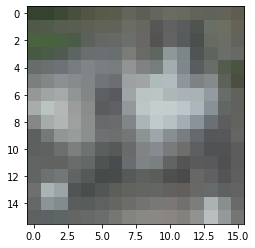

In [105]:
#Teonsor.permute()는 차원의 순서를 바꿔준다. / c x w x h -> w x h x c
oneshot = images[1].permute(1,2,0).numpy()
# plt.figure(figsize = (2,2))
plt.imshow(oneshot)
# plt.axis("off")
plt.show()

### 3-2.같은 클래스 별로 폴더를 정리한 경우 

데이터셋을 구성할 때, pytorch에서 제공하지 않은 개인 데이터셋을 사용할 수 있는데 이 경우에는 특별한 조치가 필요하다.

먼저 같은 클래스 별로 폴더가 정리되어 있다면 이전에 `torchvision.datasets.ImageFolder`를 사용해 쉽게 불러오는 것이 가능하며 
라벨링또한 자동으로 정리된다. 예시코드는 아래와 같다. 


In [4]:
# ./class 밑으로 파일들이 존재하며 파일명은 class명, 내부에는 각 class의 이미지들이 들어있다. 
transf = tr.Compose([tr.Resize(128),tr.ToTensor()])
trainset = torchvision.datasets.CIFAR10(root='./class', transform = transf)
trainloader = DataLoader(trainset,batch_size = 1, shuffle = False)


RuntimeError: Dataset not found or corrupted. You can use download=True to download it

### 3-3.정리되지 않은 커스텀 데이터 불러오기 

위처럼 데이터셋이 잘 정리되어 있는 경우 간단하게 사용하는 것이 가능하지만 대부분 그렇지 못하다.
또한 다른 작업들과 공유된 데이터인 경우 폴더를 함부로 정리하는 것이 힘들고 이미지 데이터라도 이미지가 아닌 텍스트, 리스트,배열 등의 다른 형태로 저장되어 있는 경우도 있다. 

이러한 경우 다음 양식에 맞춰 커스텀 데이터를 불러오는 방법을 이용해야 한다. 

In [6]:
from torch.utils.data import Dataset 

class imsi(Dataset): # Dataset을 상속받아 DataLoader에서 배치단위로 불러올 수 있게 해준다. 

    def __init__(self): # 데이터 세팅에 필요한 것들을 미리 정의 
        pass
 
    def __getitem__(self,indwx): # DataLoader를 통해 샘플이 요청되면 이 메소드가 호출되며 샘플을 반환해준다. 
        pass

    def __len__(self):  # 크기를 반환 
        pass 


In [19]:
train_images = np.random.randint(256,size=(100,32,32,3))/255
train_labels = np.random.randint(2,size = (100,1))


class TensorData(Dataset):

    def __init__(self,x_data, y_data):
        self.x_data = torch.FloatTensor(x_data)
        self.x_data = self.x_data.permute(0,3,1,2)
        self.y_data = torch.LongTensor(y_data)
        self.len = self.y_data.shape[0]

    def __getitem__(self, index):
        return self.x_data[index],self.y_data[index]

    def __len__(self):
        return self.len


In [20]:
train_data = TensorData(train_images,train_labels)
train_loader = DataLoader(train_data,batch_size = 10,shuffle = True)


In [26]:
x = iter(train_loader).next()
print(x[0].shape)
print(x[1].shape)

torch.Size([10, 3, 32, 32])
torch.Size([10, 1])


### 3-4.커스텀 데이터와 커스텀 전처리 사용하기

커스텀데이터셋을 사용하다보면 해당데이터셋에 맞는 전처리 기능을 직접 구현해야 할 경우가 있다. 
직접 구현해 보자 

In [46]:
class ToTensor:
    def __call__(self, sample):
        inputs,labels = sample
        inputs = torch.FloatTensor(inputs)
        inputs = inputs.permute(2,0,1)
        return inputs,torch.LongTensor(labels)

class CutOut:
    def __init__(self,ratio = .5):
        self.ratio = int(1/ratio)

    def __call__(self, sample):
        inputs, labels = sample
        active = int(np.random.randint(0,self.ratio,1))

        if active ==0:
            _, w, h = inputs.size()
            min_len = min(w,h)
            box_size = int(min_len//4)
            idx = int(np.random.randint(0,min_len-box_size,1))
            inputs[:,idx:idx+box_size,idx:idx+box_size] = 0

        return inputs, labels

In [47]:
class MyDataset(Dataset):

    def __init__(self, x_data, y_data, transform = None):
        self.x_data = x_data
        self.y_data = y_data
        self.transform = transform
        self.len = len(y_data)
        self.tensor = ToTensor()

    def __getitem__(self, index):
        sample = self.x_data[index], self.y_data[index]

        if self.transform:
            sample = self.transform(sample)
        else:
            sample = self.tensor(sample)
        return sample


    def __len__(self):
        return self.len

            


In [48]:
train_images = np.random.randint(256,size=(100,32,32,3))/255
train_labels = np.random.randint(2,size = (100,1))

trans = tr.Compose([ToTensor(),CutOut()])
dataset1 = MyDataset(train_images,train_labels, transform = trans)
train_loader1 = DataLoader(dataset1,batch_size = 10, shuffle = True)


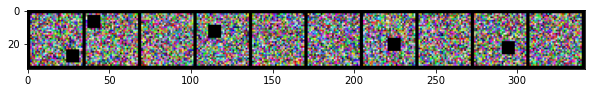

In [57]:
import torchvision
images1, labels1 = iter(train_loader1).next()

def imshow(img):
    plt.figure(figsize = (10,100))
    plt.imshow(img.permute(1,2,0).numpy()) # tensor -> numpy / cwh -> whc 
    plt.show()

# imshow(images1[0])
imshow(torchvision.utils.make_grid(images1,nrow=10))